# Demographic Plots
This notebook is used to read the data from the pickle files and to create a dataframe with the demographic data.
With this data we can create a plots to show the distribution of the demographic data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chi2_contingency

In [2]:
# Set path to data
path = "C:/Studium/dsa/data"
#path = "C:/Users/Nils/Documents/HS-Mannheim/0000_MASTER/DSA/EKG_Prog/data"
#C:\Users\klara\projects\DSA\a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0

## Load Data

In [5]:

#path = "C:/Studium/dsa/data"
#path = "C:/Users/Nils/Documents/HS-Mannheim/0000_MASTER/DSA/EKG_Prog/data"
path = "C:/Users/klara/projects/DSA/data"

categories_dict = {
'SB':    [426177001],
'AFIB':  [164889003, 164890007],
'GSVT':  [426761007, 713422000, 233896004, 233897008, 713422000],
'SR':    [426783006, 427393009]
}

data = {}
for cat_name in categories_dict.keys():
    print(f"Reading {cat_name}")
    with open(f'{path}/{cat_name}.pkl', 'rb') as f:
        records = pickle.load(f)
        data[cat_name] = records
        print(f"Length of {cat_name}: {len(records)}")

data_demographic = {'age':[], 'diag':[], 'gender':[]}
for cat_name, records in data.items():
    for record in records:
        age = record.comments[0].split(' ')[1]
        sex = record.comments[1].split(' ')[1]
        if age == 'NaN' or sex == 'NaN':
            continue
        # cut Age: from alter string 
        data_demographic['age'].append(int(age))
        data_demographic['diag'].append(cat_name)
        data_demographic['gender'].append(sex)

df_dgc = pd.DataFrame(data_demographic)

# Change from group to category
age_categories = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_dgc['age_group'] = pd.cut(df_dgc['age'], bins=age_categories)

Reading SB
Length of SB: 50
Reading AFIB
Length of AFIB: 27
Reading GSVT
Length of GSVT: 0
Reading SR
Length of SR: 13


## Plot Data

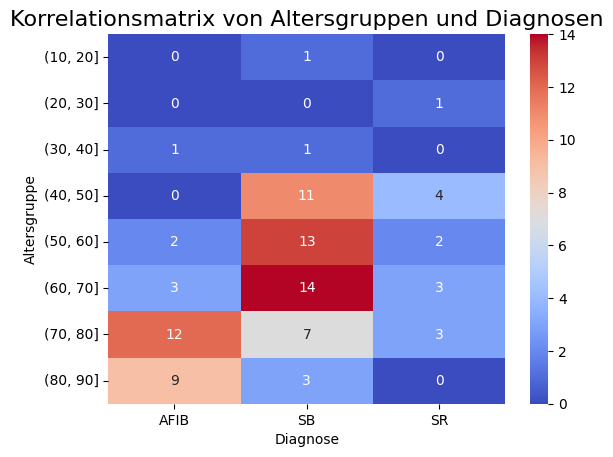

In [6]:
# Correlation matrix
corr_matrix_age_diag= pd.crosstab(df_dgc['age_group'], df_dgc['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_age_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korrelationsmatrix von Altersgruppen und Diagnosen', fontsize=16)
plt.xlabel('Diagnose')
plt.ylabel('Altersgruppe')
plt.show()

In [11]:

# Chi-square test
chi2, p, _, _ = chi2_contingency(corr_matrix_age_diag)

# Difference between observed and expected frequencies
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Check if SB (Sinusbradykardie) has a significantly higher frequency in the 60-70 age group
sb_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right'), 'SB']
sb_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum()['SB']
total_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right')].sum()
total_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum().sum()

# Frequency table for the specific Chi-Square test
observed = [[sb_60_70, total_60_70 - sb_60_70], [sb_other, total_other - sb_other]]
chi2_sb, p_sb = chi2_contingency(observed)[:2]


print(f"Chi-Square Statistic for SB in 60-70 vs others: {chi2_sb}")
print(f"P-value for SB in 60-70 vs others: {p_sb}")

Chi-Square Statistic: 38.266574797751275
P-value: 0.0004730210823940083
Chi-Square Statistic for SB in 60-70 vs others: 1.4858035714285718
P-value for SB in 60-70 vs others: 0.22286870264719977


Correlation matrix of age groups and diagnoses.This matrix describes the four diagnosis groupings on the horizontal axis and the age groupings in decades steps on the vertical axis. The color scale blue (low) to red (high) describes the correlation of the two categorization types.

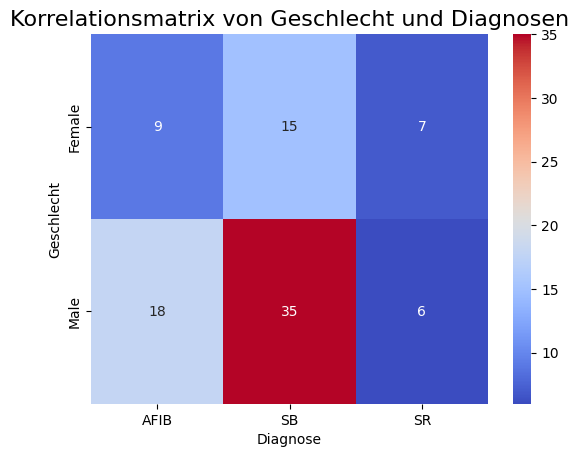

In [12]:
# cut out sex 'unknown' (because only one occurence)
df_dgc_bineary = df_dgc[df_dgc['gender'] != 'Unknown']
# Correlation matrix
corr_matrix_sex_diag = pd.crosstab(df_dgc_bineary['gender'], df_dgc_bineary['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_sex_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korrelationsmatrix von Geschlecht und Diagnosen', fontsize=16)
plt.xlabel('Diagnose')
plt.ylabel('Geschlecht')
plt.show()

Correlation matrix of genders and diagnoses. This matrix describes the four diagnosis groupings on the horizontal axis and the gender in decades steps on the vertical axis. The color scale blue (low) to red (high) describes the correlation of the two categorization types.

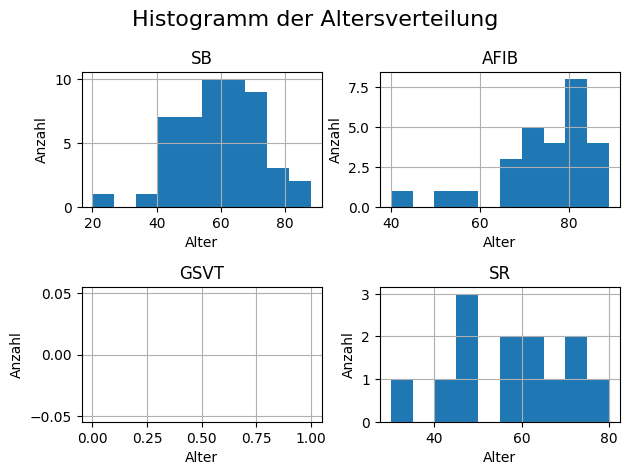

In [8]:
# 4 subplots for each diagnosis a histrgramm for the age
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histogramm der Altersverteilung', fontsize=16)
for i, cat_name in enumerate(categories_dict.keys()):
    ax = axs[i // 2, i % 2]
    df_dgc[df_dgc['diag'] == cat_name]['age'].hist(ax=ax)
    ax.set_title(cat_name)
    ax.set_xlabel('Alter')
    ax.set_ylabel('Anzahl')
    # add some space between the subplots
plt.tight_layout()
plt.show()

Histogram of the age distribution. Breakdown of grouped diagnoses by age group and absolute incidence of diagnoses.

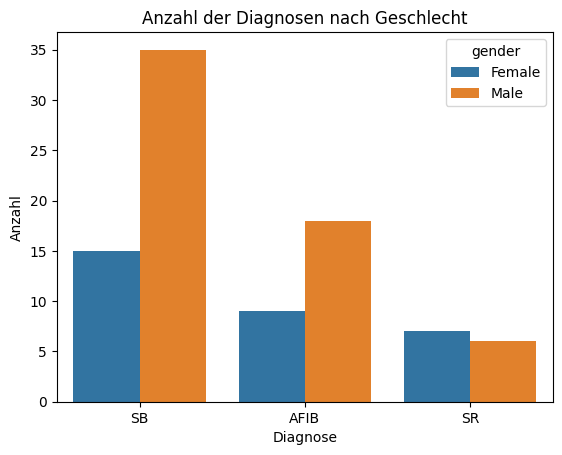

In [9]:
# a barplot for each category with the age grpuoped besides each other
fig, ax = plt.subplots()
sns.countplot(data=df_dgc_bineary, x='diag', hue='gender', ax=ax)
plt.title('Anzahl der Diagnosen nach Geschlecht')
plt.xlabel('Diagnose')
plt.ylabel('Anzahl')
plt.show()

Barplot to visualize the distribution of diagnoses by gender. Where blue is female and orange is male.

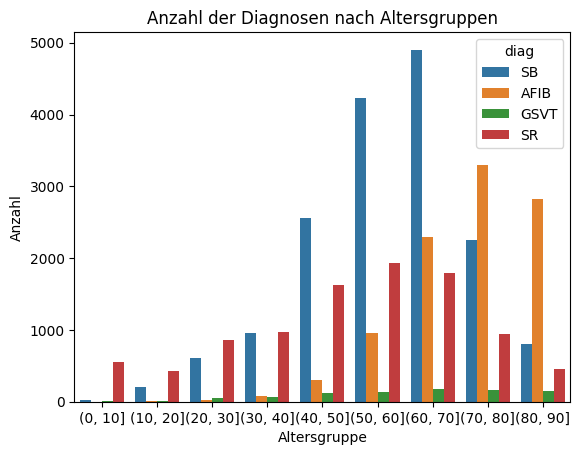

In [8]:
# barplot how many diagnosis are in each age group
fig, ax = plt.subplots()
sns.countplot(data=df_dgc, x='age_group', hue='diag', ax=ax)
plt.title('Anzahl der Diagnosen nach Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl')
plt.show()

Barplot to show the distribution of diagnoses based on the age groupings. The difference in the incidence of the various diseases can be clearly seen here.